# **災害データチャレンジ Part 2: 関数を使ってデータストーリーテリングを強化しよう**

災害データチャレンジの第2部では、**データストーリーテリング能力を高めるための関数作成**に取り組みます。  
関数を効果的に使うことで、プレゼンテーションに必要な**情報豊かなビジュアル**をより簡単に作成する方法を学びましょう。


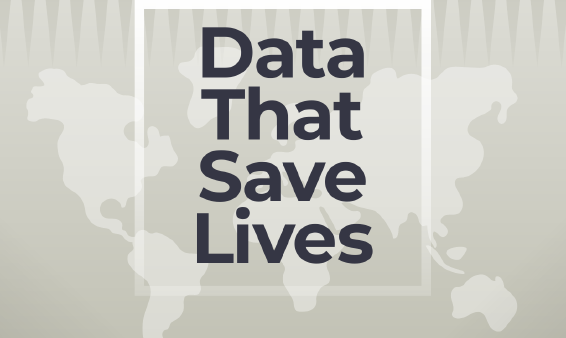

### **ゴール**
このチャレンジの終わりには、関数を活用して次のようなデータストーリーテリングの技術を身に付けることができます:
- 複数のデータ条件に基づいたグラフの生成。
- 簡単に再利用可能なコードの構築。
- プレゼンテーションで効果的に使えるビジュアル作成。

https://www.emdat.be/


## まずはデータの読み込みから

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# PDの日本語フォントをサポート
# plt.rcParams['font.family'] = 'Gothic'

# Macの日本語フォントをサポート
plt.rcParams['font.family'] = 'Hiragino Sans'

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## 関数！So useful!

Functions, 関数は "reusable code" 要するに、**再利用可能なコードブロック**。

つまり、関数は「何かをインプット」したら、「何かをアウトプット」してくれる。

例えば：

In [3]:
def reitaku_is(feeling):
    """
    指定された感情を使って麗澤大学についてのメッセージを表示します。

    Args:
        feeling (str): 麗澤大学に対する感情や印象を表す文字列。

    Example:
        reitaku_is("素晴らしい")
        # 出力: 麗澤大学は素晴らしいです。
    """
    print("麗澤大学は" + feeling + "です。")

In [4]:
reitaku_is("最高")

麗澤大学は最高です。


Well, あまり useful ではないよね〜

では、これは？

In [5]:
# リスト内の数値の平均を出力する関数
def average(numbers):
    total = 0
    for number in numbers:
        total += number
    return total / len(numbers)

In [6]:
average([1, 2, 3, 4, 5, 6])

3.5

いいね〜。もっと見たい？では、visual output はどう？

In [7]:
# 円グラフを作成する関数
def pie_chart(labels, sizes):
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

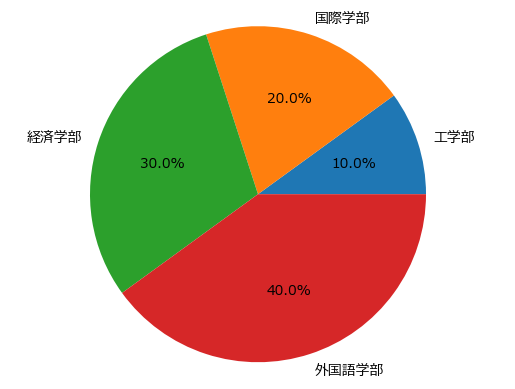

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Meiryo'
rcParams['axes.unicode_minus'] = False

pie_chart(['工学部', '国際学部', '経済学部', '外国語学部'], [10, 20, 30, 40])

In [15]:
# 棒グラフを作成する関数
def bar_chart(labels, values):
    plt.bar(labels, values)
    plt.show()

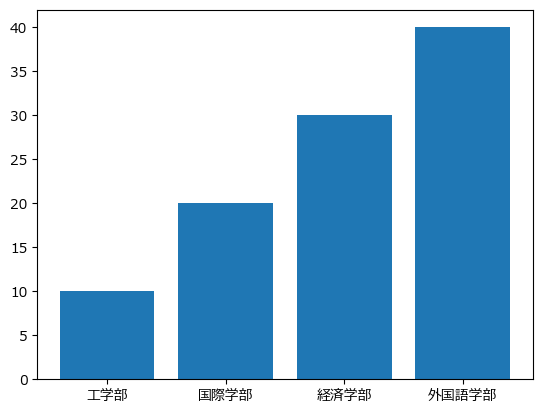

In [16]:
bar_chart(['工学部', '国際学部', '経済学部', '外国語学部'], [10, 20, 30, 40])

In [17]:
# 散布図を作成する関数
def scatter_plot(x, y):
    plt.scatter(x, y)
    plt.show()

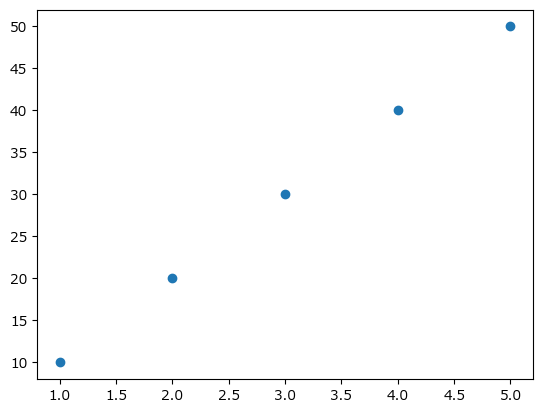

In [18]:
scatter_plot([1, 2, 3, 4, 5], [10, 20, 30, 40, 50])

In [19]:
# 線グラフを作成する関数
def line_chart(x, y):
    plt.plot(x, y)
    plt.show()

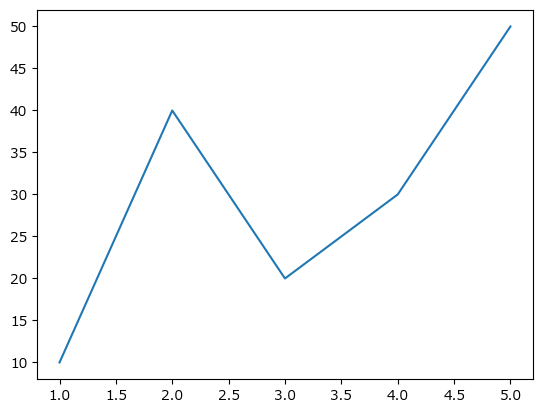

In [20]:
line_chart([1, 2, 3, 4, 5], [10, 40, 20, 30, 50])

なるほど、でももっとカッコいいものないの？

では、マップや３Dチャートはどう？

In [21]:
# 地図を作成する関数
%pip install folium
import folium

def map(latitude, longitude):
    m = folium.Map(location=[latitude, longitude])
    # marker
    folium.Marker([latitude, longitude], popup='Here').add_to(m)
    return m


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
map(35.681236, 139.767125)

In [23]:
# try other places

In [29]:
import plotly.express as px
import pandas as pd
# 3D散布図を作成する関数
def scatter_3d(x, y, z):
    fig = px.scatter_3d(x=x, y=y, z=z)
    fig.show()
    

In [30]:
scatter_3d([1, 2, 3, 4, 5], [10, 20, 30, 40, 50], [100, 200, 300, 400, 1500])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

じゃ〜データから関数は作ったらどうなる？

では、

In [33]:
def get_disaster_summary(iso_code):
    # 指定されたISOコードのデータセットをフィルタリング
    country_data = emdat[emdat['ISO'] == iso_code]
    
    # 国名を抽出
    country_name = country_data['Country'].iloc[0]
    
    # 災害の総数を計算
    total_disasters = country_data.shape[0]
    
    # 死者数の総数を計算
    total_deaths = country_data['Total Deaths'].sum()
    
    # 結果を表示
    print('国:', country_name)
    print('災害の総数:', total_disasters)
    print('死者数の総数:', total_deaths)

In [34]:
# 使用例
get_disaster_summary('JPN')

get_disaster_summary('USA')

get_disaster_summary('IND')

get_disaster_summary('CHN')

get_disaster_summary('PHL')


国: Japan
災害の総数: 391
死者数の総数: 239761.0
国: United States of America
災害の総数: 1172
死者数の総数: 45551.0
国: India
災害の総数: 785
死者数の総数: 9138244.0
国: China
災害の総数: 1023
死者数の総数: 12522453.0
国: Philippines
災害の総数: 710
死者数の総数: 73634.0


In [35]:
# use a loop!
countries = ["JPN","USA","IND","CHN","PHL"]

for country in countries:
    get_disaster_summary(country)

国: Japan
災害の総数: 391
死者数の総数: 239761.0
国: United States of America
災害の総数: 1172
死者数の総数: 45551.0
国: India
災害の総数: 785
死者数の総数: 9138244.0
国: China
災害の総数: 1023
死者数の総数: 12522453.0
国: Philippines
災害の総数: 710
死者数の総数: 73634.0


In [36]:
# 年ごとの災害数を棒グラフで表示する関数
def disasters_by_year(iso_code):
    # 指定されたISOコードのデータセットをフィルタリング
    country_data = emdat[emdat['ISO'] == iso_code]
    
    # データを年ごとにグループ化し、災害の数をカウント
    disasters_by_year = country_data.groupby('Start Year').size()
    
    # 棒グラフを作成
    bar_chart(disasters_by_year.index, disasters_by_year.values)

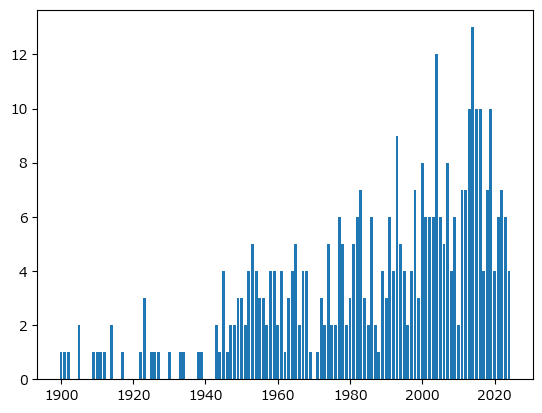

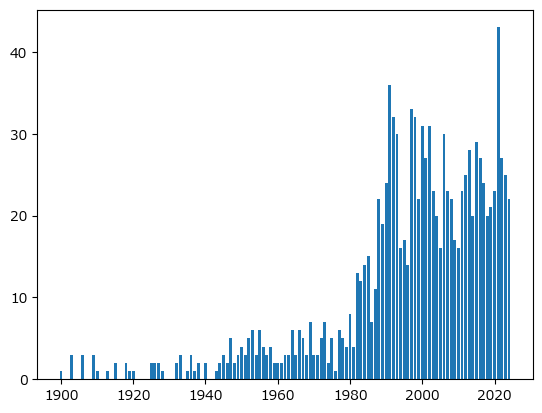

In [37]:
disasters_by_year('JPN')
disasters_by_year('USA')

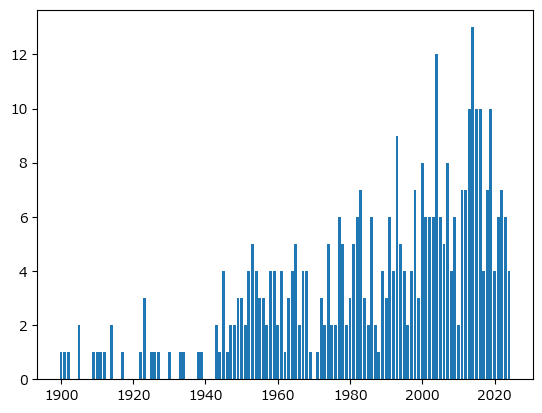

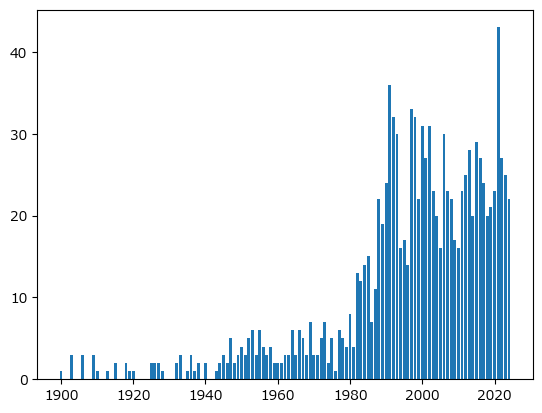

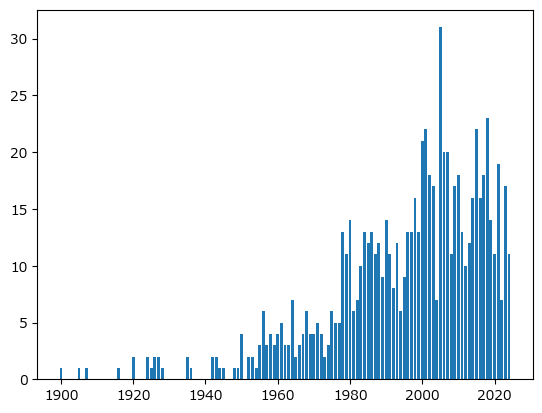

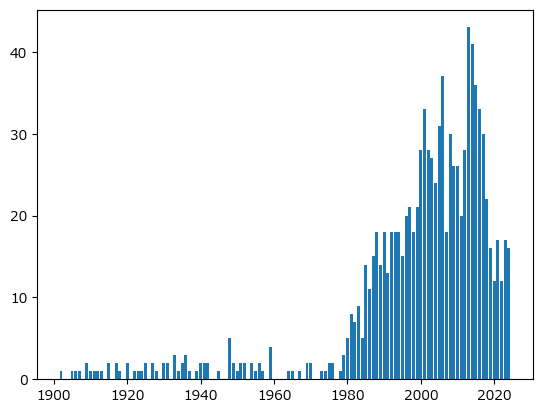

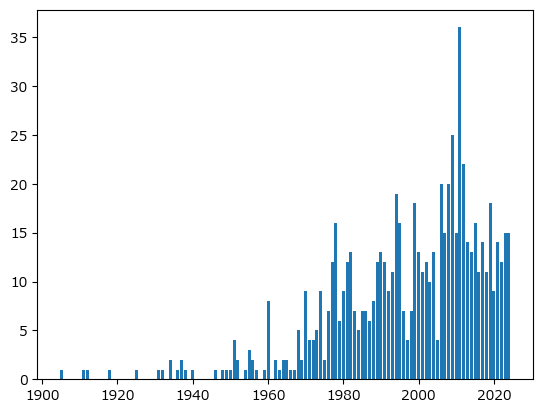

In [38]:
# loop it!
for country in countries:
    disasters_by_year(country)

すごい！もっともっと！

では、まずは次のコードブロックを実行して、じっくり内容を確認しよう。

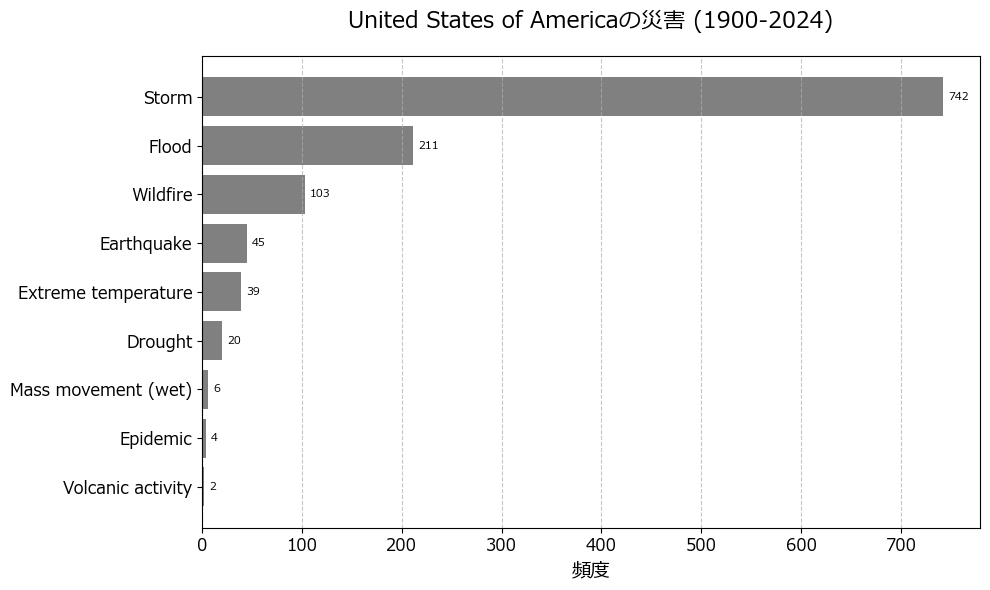

In [39]:
# 1. アメリカ合衆国の災害データをフィルタリング
disasters = emdat[emdat['ISO'] == 'USA']
country_name = disasters['Country'].iloc[0]
min_year = disasters['Start Year'].min()
max_year = disasters['Start Year'].max()

# 2. 各災害タイプの発生回数をカウント
disaster_counts = disasters['Disaster Type'].value_counts().sort_values()

# 3. 横棒グラフを作成
plt.figure(figsize=(10, 6))
bars = plt.barh(disaster_counts.index, disaster_counts.values, color='gray')

# 4. 各棒に数値ラベルを追加
for bar in bars:
    plt.text(
        bar.get_width() + 5,                        # X座標: 棒の端から少し離れた位置
        bar.get_y() + bar.get_height() / 2,         # Y座標: 棒の中央
        bar.get_width(),                            # ラベルテキスト
        va='center',                                # 垂直方向の位置: 中央
        fontsize=8                                  # ラベルのフォントサイズ
    )

# 5. プロットの美観をカスタマイズ
plt.title(f'{country_name}の災害 ({min_year}-{max_year})', fontsize=16, pad=20)
plt.xlabel('頻度', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # ラベルのクリッピングを防ぐためにレイアウトを調整

# 6. プロットを表示
plt.show()

では、このチャートを作る関数を作ろう！

## Examples

### **チャレンジ 1: 国ごとの死亡者数を可視化**
- **内容**: 指定した国の災害データを使用し、災害タイプごとの死亡者数を棒グラフで可視化する関数を作成してください。

### **チャレンジ 2: 2つの国の死亡者数を比較**
- **内容**: 指定した2つの国の死亡者数を災害タイプごとに比較する関数を作成してください。

### **チャレンジ 3: 最も致命的な災害トップNを可視化**
- **内容**: 死亡者数が多い順に、最も致命的な災害を上位N件（例: トップ5）可視化する関数を作成してください。

### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**
- **内容**: 特定の年範囲（例: 2000年から2010年）の死亡者数を可視化する関数を作成してください。

### **チャレンジ 5: カスタム可視化を作成**
- **内容**: 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。

